# READING THE DATASET

In [1]:
import os
# Sources table
src = ["amazon", "yelp", "imdb"]

In [2]:
data = {
    "sentence":[],
    "label":[],
}
for sr in src:
    with open("dataset\\"+sr+"_labelled.txt","r") as f:
        full_text = f.read().split("\n")
        for text in full_text:
            try:
                sent, label = text.split("\t")
                data["sentence"].append(sent)
                data["label"].append(int(label))
            except:
                print(text)

In [3]:
data["sentence"][0], data["label"][0]

('So there is no way for me to plug it in here in the US unless I go by a converter.',
 0)

# CONVERT THE DICTIONARY TO DATAFRAME

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.DataFrame.from_dict(data)
df.head()

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [6]:
df["label"].describe()

count    3000.000000
mean        0.500000
std         0.500083
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: label, dtype: float64

# CHECKING THE LENGTH OF EACH SENTENCE

In [7]:
df["length"] = df["sentence"].apply(len)
df["length"].head()

0    82
1    27
2    22
3    79
4    17
Name: length, dtype: int64

In [8]:
df["length"].describe()

count    3000.000000
mean       65.277000
std        44.170548
min         7.000000
25%        33.000000
50%        55.500000
75%        88.000000
max       479.000000
Name: length, dtype: float64

# LET'S PLOT THE LENGTH COLUMN

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

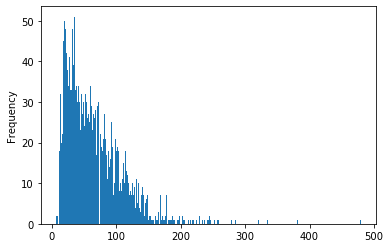

In [10]:
df["length"].plot(kind="hist", bins=479)

# TEXT PREPROCESSING

In [11]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
ps = PorterStemmer()

In [12]:
for i in range(len(df["sentence"])):
    # 1. Removing Stopwords
    temp = " ".join([word for word in df["sentence"][i].split(" ") if word not in stopwords.words("english")])
    # 2. Removing Punctuations
    temp = re.sub(r"[^\w\s]"," ", temp)
    # 3. Converting the sentence to lowecase
    temp = temp.lower()
    # 4. Stemming or lemmatizing
    temp = "".join([ps.stem(word) for word in temp])
    temp = "".join([lem.lemmatize(word) for word in temp])
    # 4. Replacing the original sentence with the above text processing procedures
    df["sentence"][i] = temp
print(df["sentence"][0])

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


so way plug us unless i go converter 


# CREATING WORD VECTORIZATION

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
"""
cv = CountVectorizer(max_features=500)
X = cv.fit_transform (df["sentence"]).toarray()
y = df["label"].values
"""
tf_idf = TfidfVectorizer(max_features=2000)
tf_idf.fit(df["sentence"])
X = tf_idf.transform(df["sentence"]).toarray()
y = df["label"].values

In [49]:
len(X[0]), type(X), type(y)

(2000, numpy.ndarray, numpy.ndarray)

# SPLITTING THE DATASET

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20,
                                                   random_state=42)
len(X_train), len(X_test)

(2980, 20)

# MODELLING THE DATASET

## 1. Trying Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

In [52]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.85


## 2.  Trying Random Forest method

In [53]:
from sklearn.ensemble import RandomForestClassifier
r_clf = RandomForestClassifier(n_estimators=100,criterion="entropy",
                              random_state=42).fit(X_train,y_train)

In [54]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.85


## 3. Trying a MLP approach

In [55]:
from sklearn.neural_network import MLPClassifier
nn_clf = MLPClassifier(random_state=42).fit(X_train, y_train)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [56]:
from sklearn.metrics import accuracy_score
y_pred = nn_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.85


## 4. Trying a DL approach 

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [33]:
# reshaping for LSTM layer
X_train = X_train.reshape(-1, 1, 500)
X_test = X_test.reshape(-1,1,500)

In [41]:
type(X_train[0]), y_train[0]

(numpy.ndarray, 1)

In [44]:
??keras.layers.RNN

# SAVING THE MODEL

In [35]:
import pickle

# Saving model to disk
pickle.dump(r_clf, open('model.pkl',"wb"))

# Saving the tf-idf vectors to disk
pickle.dump(tf_idf, open("tf_idf.pkl", "wb"))

# Loading model to compare the results
model = pickle.load(open("model.pkl","rb"))
print(model.predict(X_test[0].reshape(1,-1)))

a = "Very good product indeed"
tf = pickle.load(open("tf_idf.pkl","rb"))
X = tf.transform([a]).toarray()
print(X)

[1]
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0